# Task Managment App: Google Play Review Analysis

In [ ]:
# 📦 Install the Google Play Scraper
!pip install google-play-scraper --quiet

# 📚 Import libraries
from google_play_scraper import reviews, Sort
import pandas as pd
import time

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.1 MB/s eta 0:00:00


## Define the Apps and Scrape Reviews

In [ ]:
# Define apps and their Google Play IDs
apps = {
    'Todoist': 'com.todoist',
    'TickTick': 'com.ticktick.task',
    'Microsoft To Do': 'com.microsoft.todos',
    'Any.do': 'com.anydo'
}

# List to hold all review data
all_reviews = []

# Loop through each app and scrape 500 reviews
for app_name, app_id in apps.items():
    print(f"Scraping: {app_name}...")

    app_reviews, _ = reviews(
        app_id,
        lang='en',
        country='us',
        sort=Sort.NEWEST,
        count=1000,
        filter_score_with=None
    )

    for review in app_reviews:
        all_reviews.append({
            'app': app_name,
            'user_name': review['userName'],
            'score': review['score'],
            'at': review['at'],
            'content': review['content']
        })

    time.sleep(3)  # To avoid throttling

# Convert to DataFrame
df = pd.DataFrame(all_reviews)
df.head()


Scraping: Todoist...
Scraping: TickTick...
Scraping: Microsoft To Do...
Scraping: Any.do...


,app,user_name,score,at,content
0,Todoist,Emei KRC (Chang),5,2025-08-05 02:52:52,2DoisHuge!
1,Todoist,Anthony Vanover,5,2025-08-04 22:29:22,really helps get you on track to get more done...
2,Todoist,Liwe Madlala,5,2025-08-04 11:03:23,it's awesome
3,Todoist,vivek yadav,4,2025-08-04 03:24:28,Good App
4,Todoist,Sadhana Singh,4,2025-08-03 14:34:03,it's a good app download it and it's so motiva...


## Save them into a CSV file

In [ ]:
# Save to a CSV for future use
df.to_csv("task_app_reviews.csv", index=False)
print("✅ Saved 4000 reviews to 'task_app_reviews.csv'")

✅ Saved 4000 reviews to 'task_app_reviews.csv'


## Load & Inspect the Data

In [ ]:
import pandas as pd

# Load the scraped reviews
df = pd.read_csv("task_app_reviews.csv")
df.head()

,app,user_name,score,at,content
0,Todoist,Emei KRC (Chang),5,2025-08-05 02:52:52,2DoisHuge!
1,Todoist,Anthony Vanover,5,2025-08-04 22:29:22,really helps get you on track to get more done...
2,Todoist,Liwe Madlala,5,2025-08-04 11:03:23,it's awesome
3,Todoist,vivek yadav,4,2025-08-04 03:24:28,Good App
4,Todoist,Sadhana Singh,4,2025-08-03 14:34:03,it's a good app download it and it's so motiva...


## Clean the Review Text

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', str(text).lower())  # remove punctuation & lowercase
    return ' '.join([word for word in text.split() if word not in stop_words])

df['cleaned'] = df['content'].apply(clean_text)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,app,user_name,score,at,content,cleaned
0,Todoist,Emei KRC (Chang),5,2025-08-05 02:52:52,2DoisHuge!,2doishuge
1,Todoist,Anthony Vanover,5,2025-08-04 22:29:22,really helps get you on track to get more done...,really helps get track get done makes sure wat...
2,Todoist,Liwe Madlala,5,2025-08-04 11:03:23,it's awesome,awesome
3,Todoist,vivek yadav,4,2025-08-04 03:24:28,Good App,good app
4,Todoist,Sadhana Singh,4,2025-08-03 14:34:03,it's a good app download it and it's so motiva...,good app download motivational best students


##  Sentiment Analysis using TextBlob

In [ ]:
!pip install textblob --quiet

In [ ]:
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity  # ranges from -1 to 1

df['sentiment'] = df['cleaned'].apply(get_sentiment)
df[['app', 'sentiment']].head()

,app,sentiment
0,Todoist,0.000000
1,Todoist,0.233333
2,Todoist,1.000000
3,Todoist,0.700000
4,Todoist,0.850000


## 📊 Visualize Sentiment Distribution per App

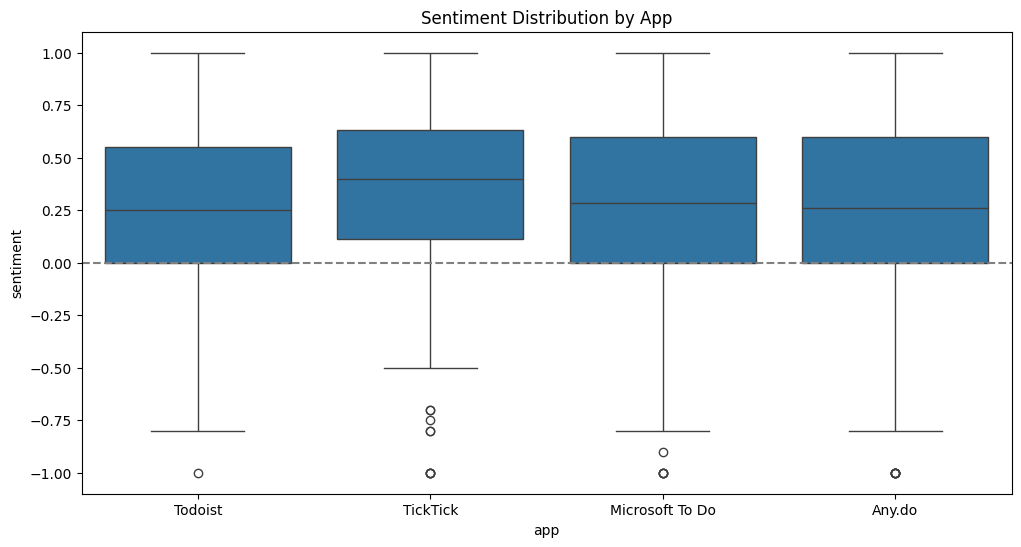

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='app', y='sentiment')
plt.title("Sentiment Distribution by App")
plt.axhline(0, color='gray', linestyle='--')
plt.show()

📊 Interpretation of Sentiment Distribution
From the boxplot above, we can observe the following:

- TickTick has the highest median sentiment score, around 0.3, indicating generally more positive reviews.

- The first quartile (Q1) of all four apps begins around 0.0, which suggests that at least 25% of reviews for each app are either neutral or slightly negative.

- The other apps (Todoist, Microsoft To Do, and Any.do) have median sentiment scores close to TickTick, with the lowest median being around 0.24.

- Overall, all apps show a moderately positive sentiment trend, but none stand out dramatically beyond TickTick.

This suggests that users generally like these apps, with some room for improvement across the board.

##  Word Cloud of Positive Reviews (What Users Like)

In [ ]:
!pip install wordcloud --quiet

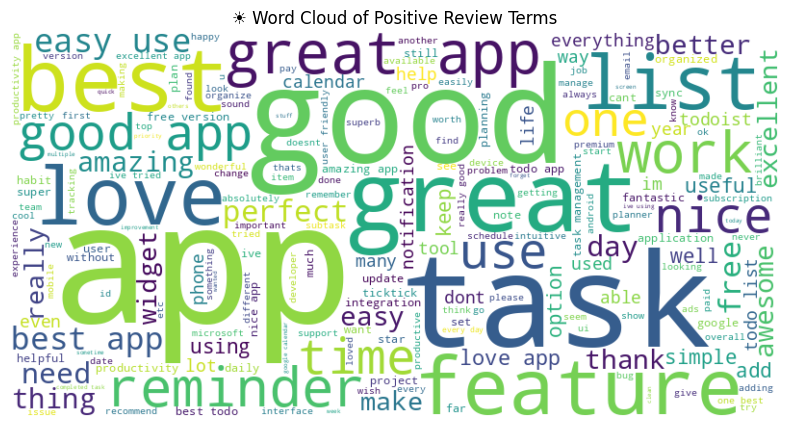

In [ ]:
from wordcloud import WordCloud

positive_reviews = df[df['sentiment'] > 0.3]['cleaned'].str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("☀️ Word Cloud of Positive Review Terms")
plt.show()


## Word Cloud of Negative Reviews (What Users Complain About / Want)

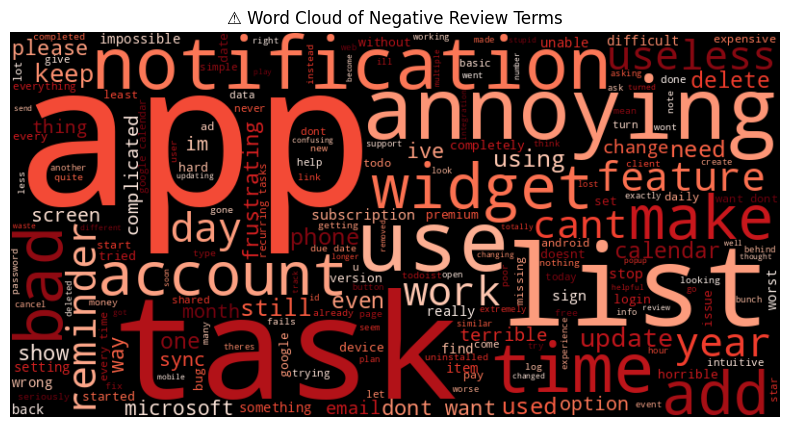

In [ ]:
negative_reviews = df[df['sentiment'] < -0.1]['cleaned'].str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("⚠️ Word Cloud of Negative Review Terms")
plt.show()


In [ ]:
num_negative_reviews = df[df['sentiment'] < -0.1].shape[0]
print(f"⚠️ Number of negative reviews found: {num_negative_reviews}")

⚠️ Number of negative reviews found: 287


## Keyword-Based Feature Extraction (Optional Summary Table)

In [ ]:
from collections import Counter

positive_words = ' '.join(df[df['sentiment'] > 0.3]['cleaned']).split()
negative_words = ' '.join(df[df['sentiment'] < -0.1]['cleaned']).split()

# Top 20 praised features/terms
print("🔥 Top praised terms:")
print(Counter(positive_words).most_common(20))

# Top 20 complaint/request terms
print("\n⚠️ Top complaint/request terms:")
print(Counter(negative_words).most_common(20))

🔥 Top praised terms:
[('app', 1025), ('good', 457), ('great', 369), ('best', 335), ('tasks', 228), ('love', 220), ('use', 199), ('easy', 163), ('task', 155), ('nice', 140), ('list', 130), ('free', 125), ('one', 119), ('like', 110), ('amazing', 105), ('features', 105), ('todo', 104), ('time', 99), ('apps', 91), ('would', 88)]

⚠️ Top complaint/request terms:
[('app', 144), ('tasks', 51), ('annoying', 38), ('use', 34), ('time', 32), ('list', 30), ('dont', 29), ('task', 27), ('bad', 26), ('want', 25), ('cant', 23), ('account', 21), ('widget', 21), ('calendar', 21), ('useless', 20), ('notifications', 20), ('add', 19), ('even', 19), ('please', 18), ('like', 18)]


# Pattern Matching: Extracting Feature Requests

🔎 1. Define Common Feature Request Patterns

In [ ]:
import re

# Define key patterns people use when requesting features
feature_request_patterns = [
    r"\bi wish (it|this app|they) (had|would)\b",
    r"\bit (would|could) be (great|nice|helpful)\b",
    r"\bshould add\b",
    r"\bneeds?\b",
    r"\bmissing\b",
    r"\bfeature request\b",
    r"\bi(?:'d| would) like\b",
    r"\bcan you add\b",
]


🔎 2. Apply Patterns to Detect Matching Reviews

In [ ]:
# Combine patterns into a single regex
pattern = re.compile('|'.join(feature_request_patterns), re.IGNORECASE)

# Create a new column that flags whether it's a feature request
df['feature_request'] = df['content'].apply(lambda x: bool(pattern.search(str(x))))


📊 3. Show Sample Feature Requests

In [ ]:
# Filter the rows that are likely feature requests
feature_requests_df = df[df['feature_request']]

# Show some samples
feature_requests_df[['app', 'content']].sample(10)

,app,content
3964,Any.do,I was debited and no email was sent to me. Why...
2064,Microsoft To Do,I really like this BUT I wish there was an eas...
312,Todoist,how much developers need to make a normal recc...
2005,Microsoft To Do,Won't stop harassing me about notifications. E...
173,Todoist,still bugging after multiple updates. I get ya...
373,Todoist,need a different way to be reminded to do task...
2796,Microsoft To Do,I like it. Everything i need
924,Todoist,"It's a great app with lots of free features, i..."
842,Todoist,12/11/24 New feature? Now I cannot set an appo...
3505,Any.do,I know I let the comment what I would like to ...


📈 4. Count Feature Requests per App

In [ ]:
feature_request_counts = feature_requests_df.groupby('app').size().reset_index(name='feature_request_count')
feature_request_counts


,app,feature_request_count
0,Any.do,52
1,Microsoft To Do,73
2,TickTick,89
3,Todoist,73


✅ Print 3 Detected Feature Requests

In [ ]:
# Show 3 sample feature request reviews
feature_requests_df[['app', 'content']].sample(3, random_state=1)

,app,content
3661,Any.do,I am a pro user. The latest update lost the du...
3362,Any.do,"really needs work hierarchy functionality, so ..."
2347,Microsoft To Do,I'm not sure why. for the reminder you have to...


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('app').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('content').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['content'].value_counts()
    for x_label, grp in _df_4.groupby('app')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('app')
_ = plt.ylabel('content')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_5['app'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_5, x='index', y='app', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_6['content'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_6, x='index', y='content', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## Now Feature Extraction Using RAKE

In [ ]:
!pip install rake-nltk --quiet

✅ Step 2: Run RAKE on Feature Request Reviews

In [ ]:
import nltk
nltk.download('punkt_tab')  # 🔧 fix the tokenizer error

from rake_nltk import Rake

# Initialize RAKE
rake = Rake()

# Get cleaned feature request texts
feature_texts = feature_requests_df['cleaned'].tolist()

# Extract keywords
keywords = []
for text in feature_texts:
    rake.extract_keywords_from_text(text)
    ranked_phrases = rake.get_ranked_phrases()
    keywords.extend(ranked_phrases)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
import string

def is_valid_feature(phrase):
    words = phrase.split()
    if len(words) < 2:
        return False
    if all(word in string.punctuation for word in words):
        return False
    if any(word in ['need', 'needs', 'needed'] for word in words) and len(words) <= 3:
        return False
    return True

# Apply improved filtering
keywords_filtered = [kw.lower().strip() for kw in keywords if is_valid_feature(kw)]
top_features = Counter(keywords_filtered).most_common(20)

for feature, count in top_features:
    print(f"{feature} – {count} mentions")


think amazing app needs features like school stuff stuff overall nice – 1 mentions
spend hours app figure user interface bare sloppy frustrating use theyve thrown lot terms capability get basics wrong simplest thing account hidden missing couldnt find – 1 mentions
love app previously used anydo great app one better workflow todo list like date integration included app fumbling around making list todo things might need ai interaction make things easier like voice reminders agenda list got started app love thanks – 1 mentions
app one best apps eveeeer simple yet comprehensive everything need write tasks subtasks categories move around easy access different boards even schedule typing everything one place yet organised exactly needed huuuuge thanks creators app – 1 mentions
everything needs quality product – 1 mentions
well would like see software interface work creating yet another online c c u n trial would beneficial one doesnt collect personal info involve toc privacy policy app proba

🚀 What Users REALLY Want (And What Drives Them Crazy!)
Alright, buckle up — here’s the lowdown from the trenches of task app reviews:

- 🎯 Progress Bars & Charts: People want to see their progress like it’s a game scoreboard. Without those, motivation tanks faster than your phone battery at 2%!

- 🎨 UI Woes: “Clunky,” “sloppy,” “confusing” — yep, users don’t hold back when the interface feels like a messy desk. Clean, simple, smooth is the vibe.

- 🔄 Recurring Tasks & Widgets: If you can’t automate or glance at your to-dos on your home screen, what’s even the point? Widgets are the new cool kids.

- 🌙 Dark Mode & Custom Colors: Because everyone secretly judges an app by how good it looks at 2 AM. Night owls unite!

- 🧠 Special Requests: ADHD-friendly features, voice input, and color-coded task lists are like comfort food for many users — they need that extra love.

- 🐞 Buggy Updates: Nothing kills trust like an update that breaks your recurring tasks. Fix it fast or users will ghost you.

- 🔒 Privacy Please: Some folks want task management without feeling like Big Brother is watching. Privacy is more than a buzzword here.

💡 So, if your app nails these, you’re already on your way to being the chosen one in the crowded task jungle.

Bonus — Look for Specific Feature Phrases

In [ ]:
common_features = [
    "dark mode", "calendar", "recurring task", "reminder", "offline",
    "widget", "sync", "voice input", "habit tracker", "project sharing",
    "priority levels", "notifications", "subtasks", "themes", "google calendar"
]

# Scan feature request reviews for these
from collections import defaultdict

feature_mentions = defaultdict(int)

for review in feature_requests_df['cleaned']:
    for feature in common_features:
        if feature in review:
            feature_mentions[feature] += 1

# Sort and show
for feature, count in sorted(feature_mentions.items(), key=lambda x: -x[1]):
    print(f"{feature} – {count} mentions")


calendar – 30 mentions
reminder – 27 mentions
widget – 20 mentions
sync – 17 mentions
notifications – 11 mentions
google calendar – 8 mentions
subtasks – 5 mentions
recurring task – 5 mentions
habit tracker – 5 mentions
offline – 2 mentions
themes – 1 mentions
dark mode – 1 mentions
priority levels – 1 mentions
